ChEn-3170: Computational Methods in Chemical Engineering Fall 2018 UMass Lowell; Prof. V. F. de Almeida **05Nov2018**

# 16. Continuous Stirred-Tank Reactor w/ Cooling Coil 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Data](#data)
* [Degrees of Freedom](#dof)
* [Total Mass Balance](#mb)
* [Species Mass Balance](#smb)
* [Energy Balance](#eb)
---

## Data<a id="data"></a>

This problem is extracted from Example 2.5 in the book: Process Dynamics and Control, Seborg, Edgar, Mellichamp, and Doyle, 4$^\text{th}$ edition, 2017.

Name                        | Parameter     | Value                | Unit             |
----------------------------|---------------------------------------------------------| 
volumetric flow rate        | q             | 100                  | L/min            | 
inflow molarity of A        | $c_{Ai}$      | 1                    | mol/L            | 
inflow temperature          | $T_i$         | 350                  | K                | 
holdup volume               | $V$           | 100                  | L                | 
mass density                | $\rho$        | 1000                 | g/L              |
heat capacity               | $C$           | 0.239                | J/(g K)          |
heat of reaction            | $-\Delta H_R$ | $5 \times 10^4$      | J/mol            |
activation temperature      | $E/R$         | 8750                 | K                |
Arrhenius frequency         | $k_0$         | $7.2 \times 10^{10}$ | $\text{min}^{-1}$|
coolant heat transfer coeff.| $UA$          | $5 \times 10^{4}$    | J/(min K)        |
coolant temperature         | $T_c(0)$      | 300                  | K                |
initial reactor molarity    | $c_A(0)$      | 0.5                  | mol/L            |
initial reactor temperature | $T(0)$        | 350                  | K                |

Note this is an exothermic reaction of production of A -> B and heat is removed from the system to prevent the temperature from increasing too much above the inflow stream temperature.

## Degrees of Freedom<a id="dof"></a>
There exists three equations (below), the total mass balance forces the volumetric flow rate to be a constant because the flow is incompressible, therefore $q$ must be specified. There exists two unknowns, namely the molarity of species A, $c_A(t)$, and the temperature of the reactor, $T(t)$. Therefore there are as many unknowns as there are equations and the problem is potentially solvable give the initial conditions for the unknowns, and all the values of the parameters in foregoing table.

## Total Mass Balance<a id="mb"></a>

\begin{equation*}
q = q_i = \text{constant} 
\end{equation*}


## Species Mass Balance<a id="smb"></a>

\begin{equation*}
V\,\frac{dc_A}{dt} = q\bigl(c_{Ai}-c_A\bigr) - V\,k\,c_A ,
\end{equation*}

where $k = k_0\,e^{\frac{-E}{R\,T}}$.

## Energy Balance<a id="eb"></a>

\begin{equation*}
V\,\rho C\,\frac{dT}{dt} = w\,C\,\bigl(T_i-T\bigr) + \bigl(-\Delta H_R\bigr)\,V\,k\,c_A + UA\,\bigl(T_c-T\bigr)
\end{equation*}

where $w$ is the mass flow rate $w = \rho\,q$.

In [9]:
'''RHS of ODEs'''

def rhs_fn( t, u_vec,
            volume, q_flow, c_ai, k_0, energy_a_over_r,
            rho, heat_capacity, temp_i, enthalpy_rxn, u_a, temp_c_0  ):
    
    c_a  = u_vec[0]
    temp = u_vec[1]
    
    import math
    k = k_0 * math.exp(-energy_a_over_r/temp)
    
    du_dt_0 = q_flow/volume*(c_ai - c_a) - k * c_a
    
    w_flow = rho*q_flow
    
    du_dt_1 =   w_flow/volume/rho*(temp_i - temp) \
              - enthalpy_rxn/rho/heat_capacity * k * c_a \
              + u_a/volume/rho/heat_capacity*(temp_c_0-temp)
    
    return [du_dt_0, du_dt_1]

In [10]:
'''Manipulated input variable'''

#temp_c_0        =   290.0  # K
#temp_c_0        =   300.0  # K
temp_c_0        =   305.0  # K

In [11]:
'''Parameters'''

q_flow          =   100.0  # L/min
c_ai            =   1.0    # mol/L
temp_i          =   350.0  # K
volume          =   100.0  # L
rho             =   1000.0 # g/L
heat_capacity   =   0.239  # J/g/K
enthalpy_rxn    = - 5.0e4  # J/mol
energy_a_over_r =   8750.0 # K
k_0             =   7.2e10 # 1/min
u_a             =   5.0e4  # J/min/K
c_a_0           =   0.5    # mol/L
temp_0          =   350.0  # K

time_final   = 10.0 # min

In [12]:
'''Algorithm paraters'''

n_time_steps = 200 # number of solution values in time
max_n_steps_per_time_step = 100 # max number of nonlinear algebraic solver iterations per time step

In [13]:
'''Read experimental data'''

import numpy as np

t_stamps = np.linspace(0.0, time_final, num=n_time_steps)

In [14]:
'''Solve ODE system'''

from scipy.integrate import odeint

max_n_steps_per_time_step = 100

u_vec_0    = np.zeros(2,dtype=np.float64)
u_vec_0[0] = c_a_0
u_vec_0[1] = temp_0

(u_vec_history, info_dict) = odeint( rhs_fn, u_vec_0, t_stamps,
                                     args=( volume, q_flow, c_ai, k_0, energy_a_over_r,
                                     rho, heat_capacity, temp_i, enthalpy_rxn, u_a, temp_c_0 ),
                                     rtol=1e-7, atol=1e-7, mxstep=max_n_steps_per_time_step,
                                     full_output=True, tfirst=True )

assert info_dict['message']=='Integration successful.',\
            'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']


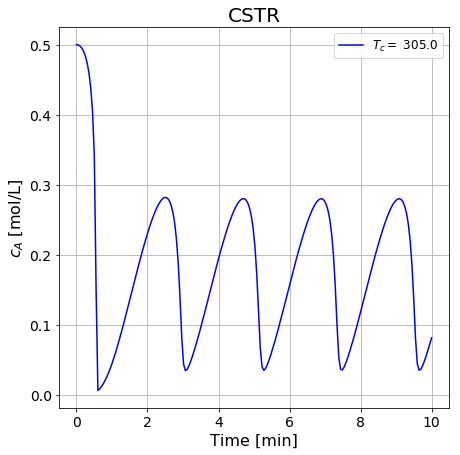

In [15]:
import matplotlib.pyplot as plt
    
plt.figure(1, figsize=(7, 7))

plt.plot(t_stamps,u_vec_history[:,0],'b-',label='$T_c=$ '+str(temp_c_0) )

plt.xlabel(r'Time [min]',fontsize=16)
plt.ylabel(r'$c_A$ [mol/L]',fontsize=16)
plt.title('CSTR',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()
print('')


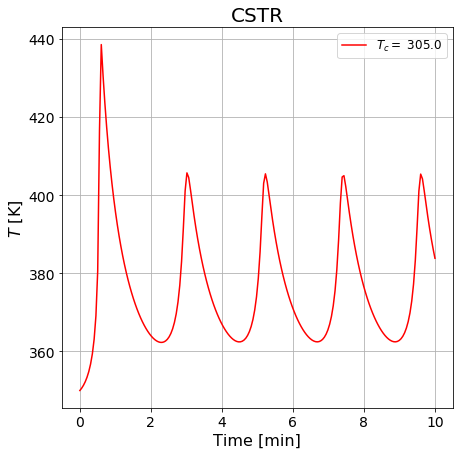

In [16]:
import matplotlib.pyplot as plt
    
plt.figure(1, figsize=(7, 7))

plt.plot(t_stamps,u_vec_history[:,1],'r-',label='$T_c=$ '+str(temp_c_0) )

plt.xlabel(r'Time [min]',fontsize=16)
plt.ylabel(r'$T$ [K]',fontsize=16)
plt.title('CSTR',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()
print('')